In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# preprocessing
import re
import string
import itertools # for flattening
# nltk library
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer as wn
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
nltk.download('punkt', quiet=True)
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# sklearn library
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

[nltk_data] Downloading package stopwords to /Users/Shen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/Shen/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Shen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Shen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data=pd.read_pickle('cleanedfile_dicejob.pickle')

In [3]:
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet # imports WordNet

## New cols created for jobdescription

In [4]:
def process_text(text, min_length):
    
    # get common stop words that we'll remove during tokenization/text normalization
    stop_words = stopwords.words('english')

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
   

    # lower case everything
    txt_lower = text.lower()

    #remove mentions, hashtags, and urls, strip whitspace and breaks
    txt_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", txt_lower).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
    #remove words with short length
    
    # remove stop words and punctuations 
    txt_norm = [x for x in word_tokenize(txt_lower) if ((x.isalpha()) & (x not in stop_words)) & (x not in ['good','great','found','company','lot','experience','fit','candidate','applicant','requirement','qualification','Deloitte','professional','year','application','opportunity','description','work','role','need','email','delivery',"req_id","job_req","req","id","please","resume","position","forward","receive","contact","minimum","required","disability","eligibility","employment","team","click"])]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    txt_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(txt_norm))) 

    # now we are going to have a cutoff here. any tokenized cocument with length < min length will be removed from corpus
    if len(txt_tagged) <= min_length:
        return ''
    else:
         # rejoins lemmatized sentence 
        txt_norm = " ".join([wnl.lemmatize(x[0], x[1]) for x in txt_tagged if x[1] is not None])
        return txt_norm


In [5]:
data['cleaned_jd'] = data['jobdescription'].apply(process_text, args = [4])


In [6]:
data['cleaned_jobtitle'] = data['jobtitle'].apply(process_text, args = [4])


In [7]:
data['cleaed_skills'] = data['skills'].apply(process_text, args = [4])


## EDA

In [8]:
def process_text(text, min_length):
    
    # get common stop words that we'll remove during tokenization/text normalization
    stop_words = stopwords.words('english')

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
   

    # lower case everything
    txt_lower = text.lower()

    #remove mentions, hashtags, and urls, strip whitspace and breaks
    txt_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", txt_lower).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
    #remove words with short length
    
    # remove stop words and punctuations 
    txt_norm = [x for x in word_tokenize(txt_lower) if ((x.isalpha()) & (x not in stop_words)) & (x not in ['good','great','found','company','lot','experience','fit','candidate','applicant','requirement','qualification','Deloitte','professional','year','application','opportunity','description','work','role','need','email','delivery',"req_id","job_req","req","id","please","resume","position","forward","receive","contact","minimum","required","disability","eligibility","employment","team","click"])]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    txt_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(txt_norm))) 

    # now we are going to have a cutoff here. any tokenized cocument with length < min length will be removed from corpus
    if len(txt_tagged) <= min_length:
        return ''
    else:
         # rejoins lemmatized sentence 
        txt_norm = [wnl.lemmatize(x[0], x[1]) for x in txt_tagged if x[1] is not None]
        return txt_norm


In [9]:
data['eda_jd'] = data['jobdescription'].apply(process_text, args = [4])


In [10]:
data['eda_jobtitle'] = data['jobtitle'].apply(process_text, args = [4])


In [11]:
data['eda_skills'] = data['skills'].apply(process_text, args = [4])


#### JOB LOCATION GRAPH

In [12]:
data.joblocation_address

0              Atlanta, GA
1              Chicago, IL
2           Schaumburg, IL
3          Bolingbrook, IL
4              Atlanta, GA
               ...        
21995          Oakland, CA
21996    San Francisco, CA
21997    San Francisco, CA
21998          Oakland, CA
21999      Santa Clara, CA
Name: joblocation_address, Length: 21542, dtype: object

In [13]:
data.joblocation_address=data.joblocation_address.str.strip(' ')

In [14]:
location = data.joblocation_address.str.split(", ", expand=True)

In [15]:
location=location.rename(columns={0:'city',1:'state'})

In [16]:
location.state=location.state.str.upper()

In [17]:
location.state.unique()

array(['GA', 'IL', 'NY', 'WA', 'CA', 'CO', 'OR', 'NV', 'MO', 'NJ', 'MN',
       'TX', 'UT', 'SC', 'PA', 'FL', 'AZ', 'VA', 'KS', 'QC', 'MD', 'DC',
       'TN', 'MA', 'MI', 'WI', None, 'NC', 'OH', 'OK', 'AL', 'DE', 'RI',
       'CT', 'ME', 'NH', 'VT', 'KY', 'NE', 'TEXAS', 'IN', 'IA', 'WV',
       'LA', 'SD', 'ID', 'AR', 'ON', 'NM', 'HI', 'AB', 'NS', 'AK', 'BC',
       'MS', 'ND', 'WY', 'WASHINGTON', 'SPRINGS'], dtype=object)

In [18]:
location.state=location.state.apply(lambda x : "TX" if x == "TEXAS" else "DC" if x == "WASHINGTON" else "NY" if x == "SPRINGS" else x)

In [19]:
import seaborn as sns

In [20]:
value_counts_state = location.state.value_counts().sort_values(ascending=False)


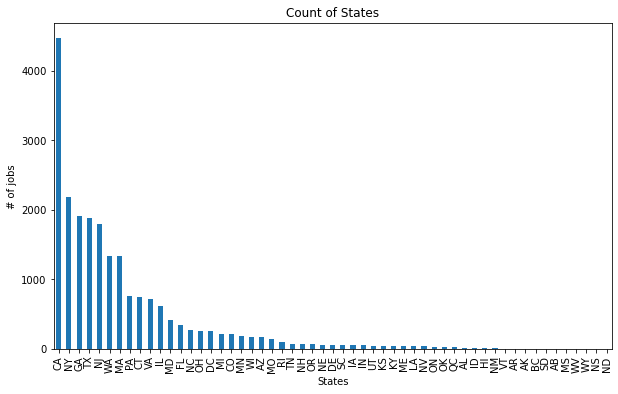

In [21]:


value_counts_state.plot(kind='bar')
plt.title('Count of States')
plt.xlabel('States')
plt.ylabel('# of jobs')

plt.gca().xaxis.set_tick_params(labelsize=10, rotation=90)

fig = plt.gcf()
fig.set_size_inches(10, 6)


plt.show()

#### Job Title WordCloud 

In [22]:
#Clean up job title for EDA - utilizing topic modeling to see the topics amongst the job titles

from sklearn.feature_extraction.text import TfidfVectorizer

corpus_title = data['cleaned_jobtitle']
vectorizer = TfidfVectorizer()
X_title_train = vectorizer.fit_transform(corpus_title)
X_title_train

<21542x2455 sparse matrix of type '<class 'numpy.float64'>'
	with 21951 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

title_topic_model = NMF(n_components = 10)
title_topic_model.fit(X_title_train)

NMF(n_components=10)

In [24]:
H = title_topic_model.transform(X_title_train) # transform document into topic vector representation

# to get W 
W = title_topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_title_train is " + str(X_title_train.shape))

Shape of W is (10, 2455)
Shape of H is (21542, 10)
Shape of X_title_train is (21542, 2455)


In [25]:
for index,topic in enumerate(W):
    print(f'THE TOP 5 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 5 WORDS FOR TOPIC #0
['perm', 'technical', 'division', 'director', 'search', 'information', 'recruiter', 'robert', 'half', 'technology']


THE TOP 5 WORDS FOR TOPIC #1
['aws', 'sdet', 'amazon', 'platform', 'network', 'devops', 'test', 'development', 'software', 'engineer']


THE TOP 5 WORDS FOR TOPIC #2
['ui', 'javascript', 'lead', 'front', 'end', 'web', 'stack', 'full', 'java', 'developer']


THE TOP 5 WORDS FOR TOPIC #3
['data', 'sale', 'market', 'financial', 'bi', 'development', 'sql', 'intelligence', 'business', 'analyst']


THE TOP 5 WORDS FOR TOPIC #4
['engineering', 'sr', 'sale', 'service', 'program', 'development', 'product', 'technical', 'project', 'manager']


THE TOP 5 WORDS FOR TOPIC #5
['service', 'server', 'capability', 'contract', 'specialist', 'security', 'sale', 'recruiter', 'web', 'senior']


THE TOP 5 WORDS FOR TOPIC #6
['analytics', 'infrastructure', 'enterprise', 'management', 'lead', 'cloud', 'big', 'solution', 'architect', 'data']


THE TOP 5 WORDS FOR TO

In [26]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 10, figsize=(20, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 15})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=13)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 5
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Top Ten Topics in Job Titles")

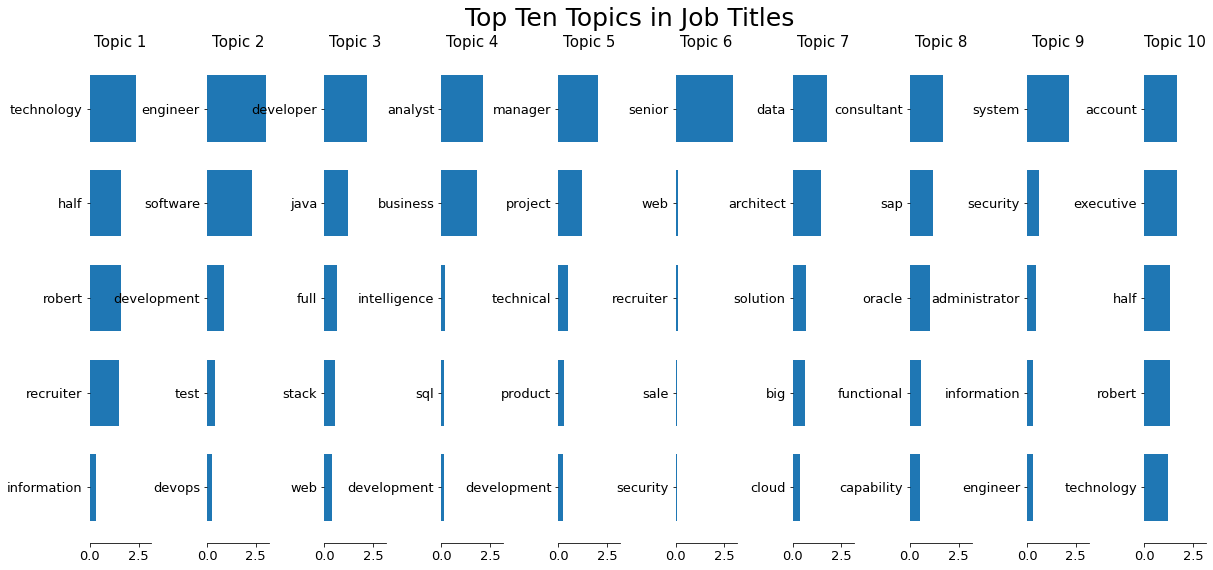

In [27]:
topic_word_plot()

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [29]:
data.head()

,advertiserurl,company,employmenttype_jobstatus,jd_old,jobid,joblocation_address,jobtitle,postdate,shift,skills,...,cleanedjd,bigramtexts,trigramtexts,joined_bigram,joined_trigram,cleaned_jobtitle,cleaed_skills,eda_jd,eda_jobtitle,eda_skills
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,SEE BELOW,...,"[look, selenium, engineer, solid, java, cod, s...","[look, selenium, engineer, solid, java, cod, s...","[look, selenium, engineer, solid, java, cod, s...",look selenium engineer solid java cod skill se...,look selenium engineer solid java cod skill se...,,,"[see, look, selenium, engineer, solid, java, c...",,
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo...",...,"[network, monitor, incident, response, system,...","[network, monitor, incident_response, system, ...","[network, monitor, incident_response, system, ...",network monitor incident_response system admin...,network monitor incident_response system admin...,,network monitor incident response system admin...,"[network, monitor, incident, response, system,...",,"[network, monitor, incident, response, system,..."
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in...",...,"[enterprise, solution, architecture, business,...","[enterprise, solution, architecture, business,...","[enterprise, solution, architecture, business,...",enterprise solution architecture business inte...,enterprise solution architecture business inte...,,enterprise solution architecture business inte...,"[enterprise, solution, architecture, business,...",,"[enterprise, solution, architecture, business,..."
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,Please see job description,...,"[java, il, client, lead, edge, software, devel...","[java, il, client, lead, edge, software, devel...","[java, il, client, lead, edge, software, devel...",java il client lead edge software development ...,java il client lead edge software development ...,java developer level culture modern technology...,,"[see, job, java, il, client, lead, edge, softw...","[java, developer, level, culture, modern, tech...",
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma...",...,"[configuration, management, developer, linux, ...","[configuration, management, developer, linux, ...","[configuration, management, developer, linux, ...",configuration management developer linux manag...,configuration management developer linux manag...,,configuration management developer linux manag...,"[configuration, management, developer, linux, ...",,"[configuration, management, developer, linux, ..."


In [30]:
jobtitle_wordcloud = WordCloud(width=800, height=800, 
                      min_font_size=10).generate(data['jobtitle'].to_string())

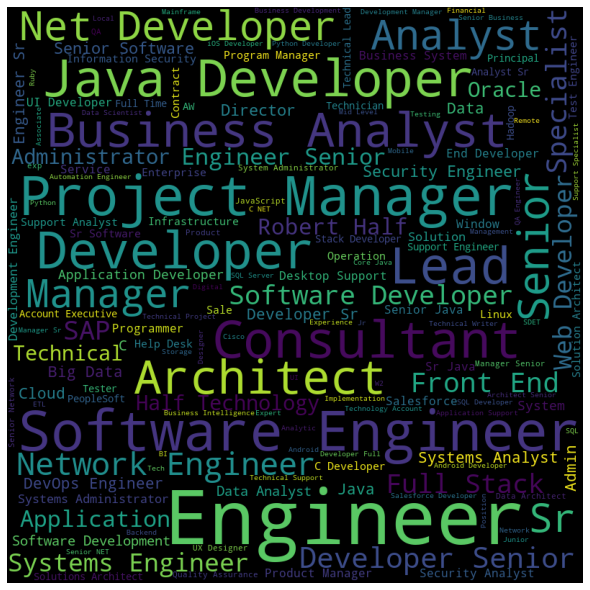

In [31]:
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(jobtitle_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
  
plt.show()

In [32]:
wordcloud = WordCloud(width=800, height=800, 
                      min_font_size=10).generate(data['cleaed_skills'].to_string())

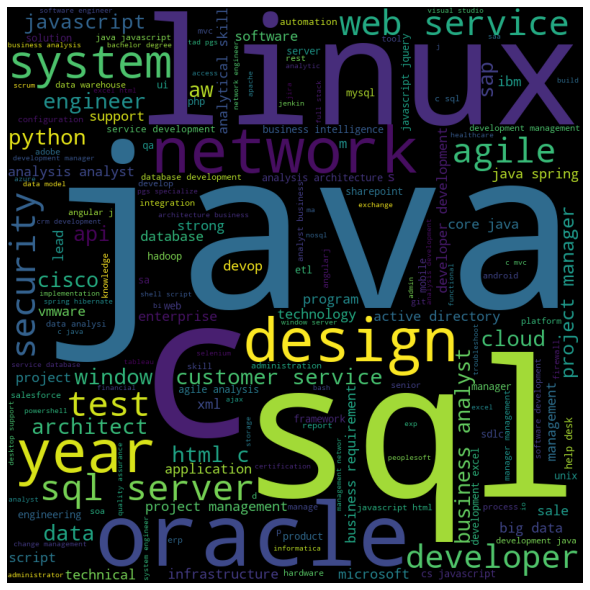

In [33]:
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
  
plt.show()

In [34]:
data['jobdescription']=data['jobdescription'].drop_duplicates()

In [35]:
company=data['company'].value_counts()[:21]

In [ ]:
company.plot(kind='bar')
plt.title("20 Companies with the most number of jobs")
plt.xlabel('Companies')
plt.ylabel('# of jobs')

plt.gca().xaxis.set_tick_params(labelsize=10, rotation=90)

fig = plt.gcf()
fig.set_size_inches(10, 6)


plt.show()

In [ ]:
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(company_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
  
plt.show()